# Feature Engineering

Parte: T-Bag

Features:
* Owner_Type
* Engine
* Seats

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# import data
data = pd.read_csv('../input/train.csv')
# visualize first 5 rows
data.head()

,id,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


In [4]:
print(data.isnull().sum())

id                      0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5032
Price                   0
dtype: int64


## Owner_Type

In [5]:
print(data['Owner_Type'].nunique())
print(data['Owner_Type'].unique())

4
['First' 'Second' 'Fourth & Above' 'Third']


Como só tem 4 valores distintos vou discretizar, mas primeiro analisar a distribuição

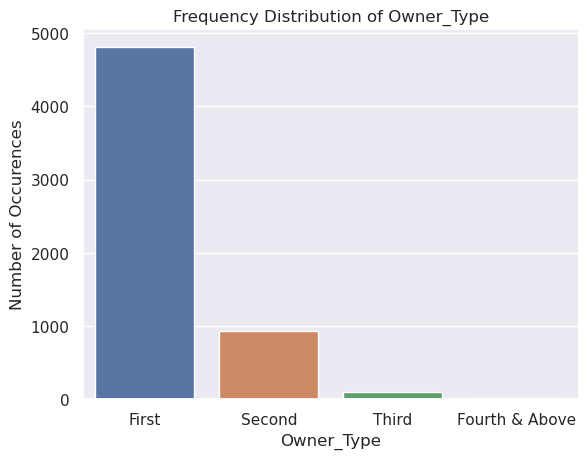

Owner_Type
First             4811
Second             925
Third              103
Fourth & Above       8
Name: count, dtype: int64


In [6]:
incidents_count = data['Owner_Type'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=incidents_count.index, y=incidents_count.values)
plt.title('Frequency Distribution of Owner_Type')
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Owner_Type', fontsize=12)
plt.show()
print(incidents_count)

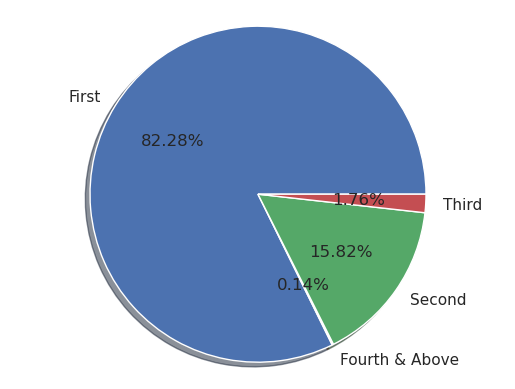

In [7]:
labels = data['Owner_Type'].astype('category').cat.categories.tolist()
counts = data['Owner_Type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True)
ax1.axis('equal')
plt.show()

### Coisas a Retirar:

Como temos poucas ocorrencias de alguns valores, se tiver uma boa correlação podemos utilizar pra prever

### Discretizar

Como Third e Fourth & Above tem poucas entradas juntamos os dois

In [8]:
replace_map = {'Owner_Type': { 'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above':3 }}
print(replace_map)

{'Owner_Type': {'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 3}}


In [9]:
data.replace(replace_map, inplace=True)
data

,id,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,1,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,1,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
5843,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,1,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
5844,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,2,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
5845,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,1,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


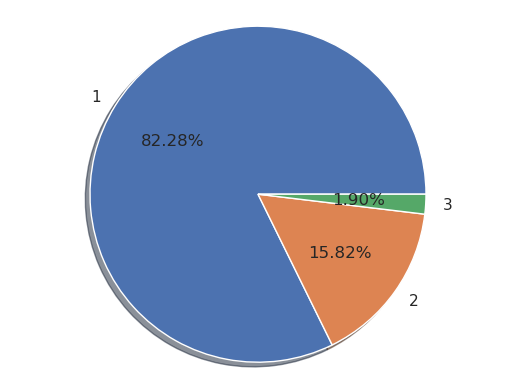

In [10]:
labels = data['Owner_Type'].astype('category').cat.categories.tolist()
counts = data['Owner_Type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True)
ax1.axis('equal')
plt.show()

## Seats

In [11]:
print(f"Número de valores em falta: {data['Seats'].isnull().sum()}")
print(f"Número de valores distintos: {data['Seats'].nunique()}")
print(f"Tipo da coluna {data['Seats'].dtypes}")
print(data['Seats'].head())

Número de valores em falta: 38
Número de valores distintos: 8
Tipo da coluna float64
0    5.0
1    5.0
2    7.0
3    5.0
4    5.0
Name: Seats, dtype: float64


À semelhança do que se fez com 'Engine', vou verificar se há algum carro com valor de 'Seats' em falta que tenha outra entrada no dataset com o valor preenchido

In [12]:
groupSitsByName = data.groupby('Name')['Seats'].mean().to_dict()
data['Seats'].fillna(data['Name'].map(groupSitsByName), inplace=True)
print(f"Número de valores em falta: {data['Seats'].isnull().sum()}")
print(data[data['Seats'].isnull()])


Número de valores em falta: 32
        id                                          Name    Location  Year  \
200    208                          Maruti Swift 1.3 VXi     Kolkata  2010   
220    229                              Ford Figo Diesel   Bangalore  2015   
709    733                          Maruti Swift 1.3 VXi     Chennai  2006   
723    749                  Land Rover Range Rover 3.0 D      Mumbai  2008   
1253  1294                             Honda City 1.3 DX       Delhi  2009   
1284  1327                          Maruti Swift 1.3 ZXI   Hyderabad  2015   
1412  1460  Land Rover Range Rover Sport 2005 2012 Sport  Coimbatore  2008   
2014  2074                          Maruti Swift 1.3 LXI        Pune  2011   
2036  2096                     Hyundai Santro LP zipPlus  Coimbatore  2004   
2256  2325                      Maruti Swift 1.3 VXI ABS        Pune  2015   
2266  2335                          Maruti Swift 1.3 VXi      Mumbai  2007   
2447  2530                       

Vou agora verificar a correlação com outras variáveis

In [13]:
corr = data.corr(method='pearson', numeric_only=True)['Seats']
print(corr)

id                  -0.013901
Year                 0.008568
Kilometers_Driven    0.083243
Owner_Type           0.010065
Seats                1.000000
Price                0.053437
Name: Seats, dtype: float64


In [14]:
data['Seats'] = data['Seats'].fillna(data['Seats'].mode()[0])
print(f"Seats agora tem {data['Seats'].isnull().sum()} valores em falta")

Seats agora tem 0 valores em falta


Vou prreencher consoante um bin por Engine, sendo que tem uma correlação de 0.4 (nao feito)

In [15]:
#engineBin = pd.cut(data['Engine'], bins=10)
#
#groupByEngineBin = data.groupby(engineBin)
#print(groupByEngineBin)
#data['Seats'] = data['Seats'].fillna(data['Engine'].map(groupByPriceBin), inplace=True)
##data['Seats'] = data['Seats'].astype(int)
#print(f"Engine agora tem {data['Seats'].isnull().sum()} valores em falta")
#data.head()
#print(data[data['Seats'].isnull()])
#print(engineBin)

## Engine

Analisar os valores e se tem valores em falta

In [16]:
print(f"Número de valores em falta: {data['Engine'].isnull().sum()}")
print(f"Número de valores distintos: {data['Engine'].nunique()}")
print(f"Tipo da coluna {data['Engine'].dtypes}")
print(data['Engine'].head())

Número de valores em falta: 36
Número de valores distintos: 140
Tipo da coluna object
0    1582 CC
1    1199 CC
2    1248 CC
3    1968 CC
4    1461 CC
Name: Engine, dtype: object


Verificar se todos os valores acabam em CC

In [17]:
condition = True
for val in data['Engine'].dropna():
    _, cc = val.split(" ")
    if cc != "CC":
        condition = False
if condition:
    print("Acabam todos em CC (menos os na)")
else:
    print("Não acabam todos em CC (menos os na)")

Acabam todos em CC (menos os na)


Ou seja, podemos substituir apenas pelo número se necessário

### Tratamento de valores em falta

Como já verificamos tem 36 valores em falta que devem ser tratados.


Para fazer o tratamento vou verificar a correlação desta variável como numérica com as outras

In [18]:
# Função pra transformar valor em int
def removeCC(val):
    num, _ = val.split(" ")
    return int(num)

data = data.copy()
data['Engine'] = data['Engine'].map(removeCC, na_action="ignore")
print(data['Engine'].isnull().sum())

36


In [19]:
from sklearn.preprocessing import StandardScaler

data2 = data.copy()

replace_map2 = {'Transmission': { 'Manual': 1, 'Automatic': 2}}
data2.replace(replace_map2, inplace=True)

# We scale the kilometers driven so that the feature has a mean of 0 and std deviation of 1 (z-score normalization)
scaler = StandardScaler()
data2['Kilometers_Driven'] = scaler.fit_transform(data2[['Kilometers_Driven']])
data2.rename(columns={'Kilometers_Driven': 'Km_Driven_Scaled'}, inplace=True)
data2

,id,Name,Location,Year,Km_Driven_Scaled,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,-0.188479,Diesel,1,1,19.67 kmpl,1582.0,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,-0.134350,Petrol,1,1,13 km/kg,1199.0,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,0.309509,Diesel,1,1,20.77 kmpl,1248.0,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,-0.192051,Diesel,2,2,15.2 kmpl,1968.0,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,0.309498,Diesel,1,1,23.08 kmpl,1461.0,63.1 bhp,5.0,NaN,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,6014,Maruti Swift VDI,Delhi,2014,-0.336089,Diesel,1,1,28.4 kmpl,1248.0,74 bhp,5.0,7.88 Lakh,4.75
5843,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,0.450244,Diesel,1,1,24.4 kmpl,1120.0,71 bhp,5.0,NaN,4.00
5844,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,-0.036917,Diesel,1,2,14.0 kmpl,2498.0,112 bhp,8.0,NaN,2.90
5845,6017,Maruti Wagon R VXI,Kolkata,2013,-0.134350,Petrol,1,1,18.9 kmpl,998.0,67.1 bhp,5.0,NaN,2.65


In [20]:
engine_corr = data2.corr(method='pearson', numeric_only=True)
print(engine_corr['Engine'])

id                 -0.006583
Year               -0.068473
Km_Driven_Scaled    0.093179
Transmission        0.498107
Owner_Type          0.058574
Engine              1.000000
Seats               0.400038
Price               0.656374
Name: Engine, dtype: float64


Podemos verificar que 'Engine' tem uma correlação de coeficiente 0.65 com 'Price', pelo que podemos tentar substituir os valores de Engine em falta tendo isso em conta

In [25]:
group = data.groupby('Name')['Engine'].mean().to_dict()
data['Engine'].fillna(data['Name'].map(group), inplace=True)
print(data['Engine'].isnull().sum())
# print(data)

31
        id                           Name    Location  Year  Km_Driven_Scaled  \
1        2                   Honda Jazz V     Chennai  2011         -0.134350   
8       10               Maruti Ciaz Zeta       Kochi  2018         -0.354200   
26      28            Honda WRV i-VTEC VX       Kochi  2018         -0.227127   
32      34  Volkswagen Vento 1.6 Highline  Coimbatore  2014         -0.032252   
34      36  Maruti Vitara Brezza ZDi Plus       Kochi  2018         -0.090235   
...    ...                            ...         ...   ...               ...   
5827  5999          Tata Bolt Revotron XT     Chennai  2016         -0.524079   
5830  6002  Volkswagen Vento 1.6 Highline      Mumbai  2011         -0.220956   
5833  6005       Maruti Vitara Brezza VDi        Pune  2016         -0.229530   
5838  6010           Honda Brio 1.2 VX MT       Delhi  2013         -0.267009   
5842  6014               Maruti Swift VDI       Delhi  2014         -0.336089   

     Fuel_Type  Transmis

Vou fazer binning pelo preço e ver a média de Engine

In [22]:
# price_bin = pd.cut(data['Price'], bins=int(data['Price'].max()))

# groupByPriceBin = data.groupby(price_bin)['Engine'].mean().to_dict()
# data['Engine'].fillna(data['Price'].map(groupByPriceBin), inplace=True)
# data['Engine'] = data['Engine'].astype(int)
# print(f"Engine agora tem {data['Engine'].isnull().sum()} valores em falta")
# data.head()

In [23]:
engine_corr = data.corr(method='pearson', numeric_only=True)
print(engine_corr['Engine'])

id                  -0.006589
Year                -0.067813
Kilometers_Driven    0.093134
Owner_Type           0.058216
Engine               1.000000
Seats                0.400105
Price                0.656416
Name: Engine, dtype: float64


## Analisar a Correlação

<Axes: >

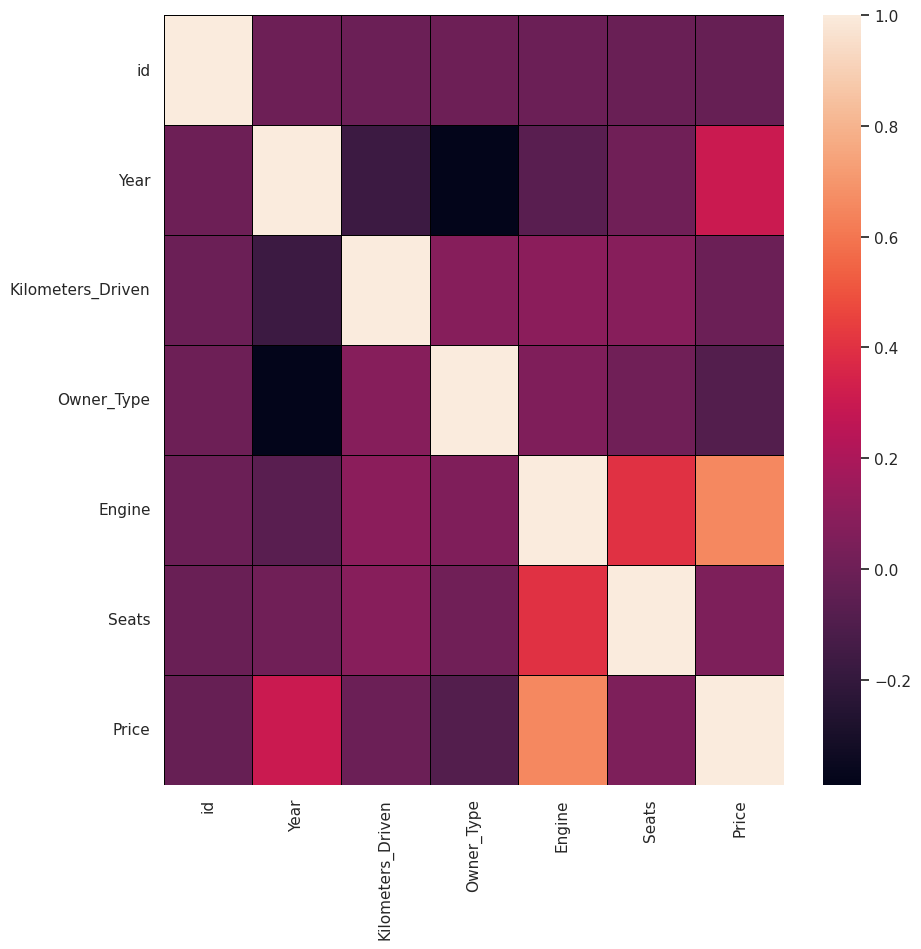

In [24]:
fig = plt.figure(figsize=(10,10))

corr = data.corr(method='pearson', numeric_only=True)
sns.heatmap(corr, linecolor="black", linewidths=0.5)